# Containment queries

A common problem you may encounter in spatial analysis is finding out what objects (e.g., in spatial biology, transcripts, nuclei, cells, region annotations etc) are contained in other objects (e.g., in spatial biology, cells, pathology annotations etc). MuSpAn has querying infrastructure to address this problem directly. In this tutorial we'll walkthough how we can query if a set of objects is contained in another. 

To start, we'll load in a example dataset that is composed of point-like Macrophages and shapes defining epithelial regions and hypoxia levels within them.

MuSpAn domain loaded successfully. Domain summary:
Domain name: Example ROI from Pugh/Macklin H&N cancer hypoxia data
Number of objects: 1163
Collections: ['Macrophages', 'Pimo', 'PanCK', 'CAIX', 'Simplified boundaries']
Labels: [] 
Networks: [] 
Distance matrices: []


(<Figure size 1000x800 with 2 Axes>, <Axes: >)

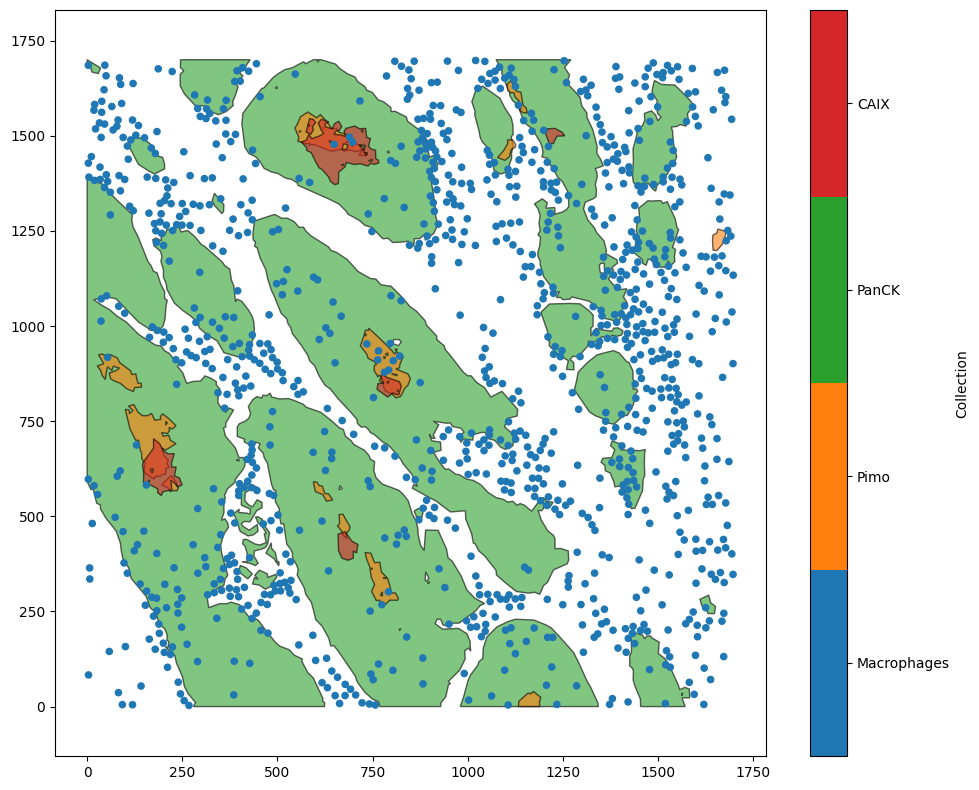

In [1]:
import muspan as ms
import matplotlib.pyplot as plt 

# Load in the example domain
example_domain = ms.datasets.load_example_domain('Macrophage-Hypoxia-ROI')

# visualise the example domain
ms.visualise.visualise(example_domain)

We'll design a query that idenifies which macrophages are within a epithelial region (PanCK shapes). To do this, we'll need to set the 'property' parameter in a query to 'contains'. In particular, a general query is of the form:

some_query = ms.query.query(domain, property, relation, comparison_value)

Here, we want to set property = (‘contains’, (contained_objects, containing_objects)) where containing_objects are the shapes we are wanting to query inside of, and contained_objects are the set of objects that were are filtering. 

For our example, containing_objects are the set of PanCK shapes and contained_objects are the Macrophages. Check out [queries](../../generated/muspan.query.query.html) for full documentation on the other parameters of queries.

Let's construct two containment queries, for Macrophages inside and outside of the epithelium.


In [2]:
# creating queries for the objects of interest
query_macrophage = ms.query.query(example_domain, ('collection',),'is', 'Macrophages')
query_tumour = ms.query.query(example_domain, ('collection',),'is', 'PanCK')

# query which macrophages are in the tumour
query_mac_in_tumour = ms.query.query(example_domain,('contains',(query_macrophage,  query_tumour )), 'is', True)

# query which macrophages are outside the tumour
query_mac_outside_tumour = ms.query.query(example_domain,('contains',(query_macrophage,  query_tumour )), 'is', False)

Now we have our containment queries, we can check these are the expected populations by visualising them.

Text(0.5, 1.0, 'Macrophages outside Tumour')

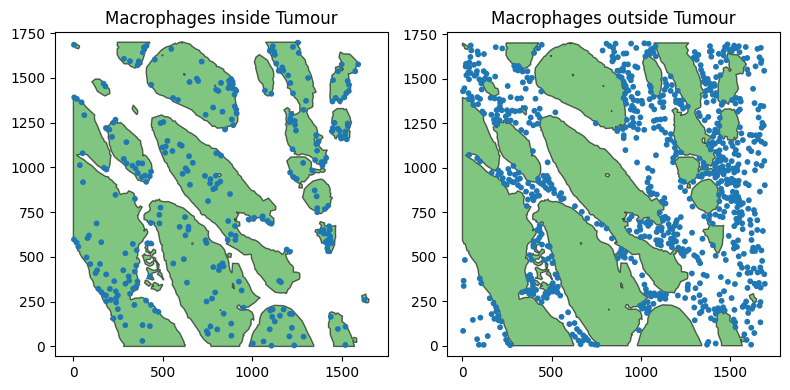

In [3]:
# plot the tumour and filtered macrophages together
fig,ax=plt.subplots(1,2, figsize=(8,4))
ms.visualise.visualise(example_domain,objects_to_plot=query_mac_in_tumour,marker_size=10,ax=ax[0],add_cbar=False)
ms.visualise.visualise(example_domain,objects_to_plot=query_tumour,ax=ax[0],add_cbar=False)
ax[0].set_title('Macrophages inside Tumour')

ms.visualise.visualise(example_domain,objects_to_plot=query_mac_outside_tumour,marker_size=10,ax=ax[1],add_cbar=False)
ms.visualise.visualise(example_domain,objects_to_plot=query_tumour,ax=ax[1],add_cbar=False)
ax[1].set_title('Macrophages outside Tumour')

Though we made explicit queries to isolate the collections of Macrophages and PanCK, we can also use the shorthand tuple syntax to achieve the same queries in a single line.

In [4]:
query_mac_in_tumour_shorthand = ms.query.query(example_domain,('contains',( ('collection','Macrophages'),('collection','PanCK') )),'is', True)

Let's just plot this again to double check they are producing the same populations.

The shorthand query is equivalent to the original query.


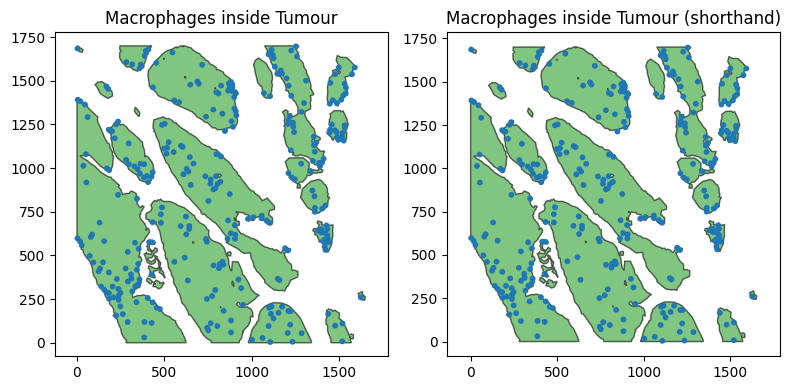

In [5]:
# plot the tumour and filtered macrophages together
fig,ax=plt.subplots(1,2, figsize=(8,4))
ms.visualise.visualise(example_domain,objects_to_plot=query_mac_in_tumour,marker_size=10,ax=ax[0],add_cbar=False)
ms.visualise.visualise(example_domain,objects_to_plot=query_tumour,ax=ax[0],add_cbar=False)
ax[0].set_title('Macrophages inside Tumour')

ms.visualise.visualise(example_domain,objects_to_plot=query_mac_in_tumour_shorthand,marker_size=10,ax=ax[1],add_cbar=False)
ms.visualise.visualise(example_domain,objects_to_plot=query_tumour,ax=ax[1],add_cbar=False)
ax[1].set_title('Macrophages inside Tumour (shorthand)')


# double check that the shorthand query is equivalent to the original query
are_queries_equal=(ms.query.interpret_query(query_mac_in_tumour_shorthand) == ms.query.interpret_query(query_mac_in_tumour)).all()

if are_queries_equal:
    print("The shorthand query is equivalent to the original query.")

Critically, this can work for query any type of object, i.e., for querying whether a shape is within another. For example, we could ask which CAIX regions are fully contained within Pimo. 

(<Figure size 1000x800 with 2 Axes>, <Axes: >)

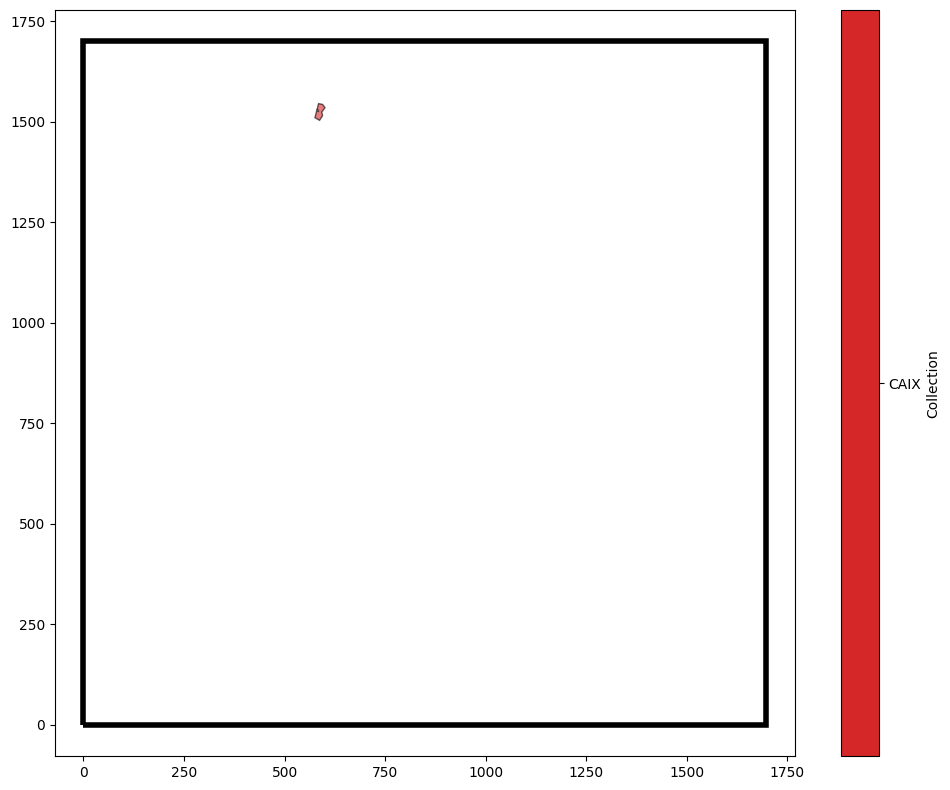

In [6]:
query_Pimo_containing_CAIX = ms.query.query(example_domain,('contains',( ('collection','CAIX'),('collection','Pimo') )),'is', True)

ms.visualise.visualise(example_domain,objects_to_plot=query_Pimo_containing_CAIX,show_boundary=True)

Only one region of CAIX is completely contained within a Pimo region in our domain.

As with all queries, containment queries can be composed with any other query using a query containers. Check out our tutorial and documentation of query containers on how to do this.